# Cropped the images

This notebook is used to cropped image and pick up only the fish. 
We use the file markers.csv, created with the shiny application. 

In [41]:
import os 
from scipy import ndimage
from subprocess import check_output
import csv
import pandas as pd

import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### Importatin data set markers

In [4]:
os.chdir('/Users/HUGO/Documents/Kaggle/FISH')
markers = pd.DataFrame.from_csv('markers.csv', header=0, sep=',')

Original image (you can change the image with the number i). 

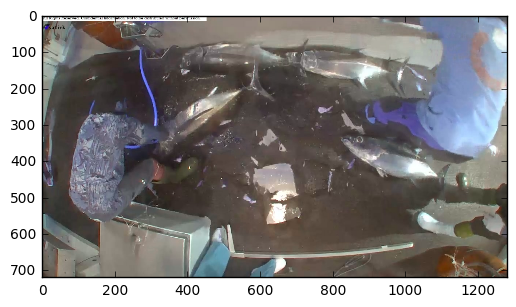

In [165]:
# load the image and show it
folder="/Users/HUGO/Documents/Kaggle/FISH/train"
i=0 # use to cross the markers file
image = cv2.imread(folder+'/'+markers.iloc[i,0]+'/'+ markers.index[i])
plt.imshow(image)

Cropped image

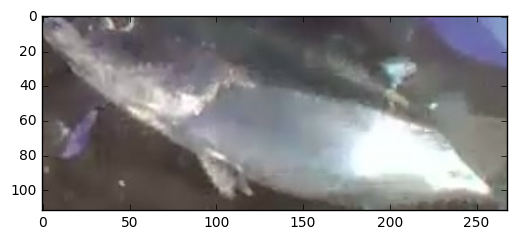

In [166]:
_,head_x , head_y , tail_x,tail_y = markers.iloc[i,:]
head_x = head_x.astype('int')
head_y = image.shape[0] - head_y.astype('int') # Carful, there is a differnce between the plot of R and python
tail_x = tail_x.astype('int') 
tail_y = image.shape[0] - tail_y.astype('int') 
cropped = image[(min(tail_y,head_y)):(max(tail_y,head_y)),min(head_x,tail_x):max(head_x,tail_x),:]
plt.imshow(cropped)

## Tips for resized an image (for Marice)

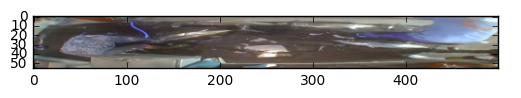

In [173]:
# we need to keep in mind aspect ratio so the image does
# not look skewed or distorted -- therefore, we calculate
# the ratio of the new image to the old image
r = 100.0 / image.shape[1]
dim = (500, int(image.shape[0] * r))
 
# perform the actual resizing of the image and show it
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized)